<a href="https://colab.research.google.com/github/barmanax/llm-icc-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas

# Import necessary libraries
import pandas as pd
import pingouin as pg

# Load the data into a DataFrame
data = pd.read_csv('grades.csv')

# List of LLMs and rubric categories
llms = ['GPT', 'cla', 'cop', 'gem']
categories = ['algd', 'clar', 'comp', 'logi']

# Initialize a dictionary to store ICC results
icc_results = {}

# Loop through each LLM and rubric category
for llm in llms:
    icc_results[llm] = {}
    for category in categories:
        # Filter data for the specific LLM and rubric category
        filtered_data = data[(data['AISystem'] == llm) & (data['Category'] == category)]

        # Pivot the data to have one column per Trial
        pivot_data = filtered_data.pivot_table(index='StudentID', columns='Trial', values='Grade').dropna()

        # Calculate ICC for the LLM and rubric category
        # Reset index and rename the column in two steps since 'name' is not supported in older pandas versions
        pivot_data_reset = pivot_data.reset_index()
        pivot_data_reset = pivot_data_reset.rename(columns={'index': 'StudentID'})

        icc_result = pg.intraclass_corr(data=pivot_data_reset, targets='StudentID', raters='Trial', ratings='Grade')
        icc_results[llm][category] = icc_result

# Output the ICC results
for llm in icc_results:
    for category in icc_results[llm]:
        print(f"Intraclass Correlation Coefficient (ICC) for {llm} in {category} category:\n", icc_results[llm][category], "\n")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


AssertionError: 

In [ ]:
!pip install pandas
!pip install pingouin

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import pingouin as pg

# Load the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/ASSIP_DATA/grades.csv')
print(data.head())

# List of LLMs and rubric categories
llms = ['GPT', 'cla', 'cop', 'gem']
categories = ['algd', 'clar', 'comp', 'logi']

# Initialize a dictionary to store ICC results
icc_results = {}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Category AISystem StudentID  Trial  Grade
0     algd      GPT        AB      5     12
1     algd      GPT       AIM      5     10
2     algd      GPT       KAK      4     12
3     algd      GPT        VK      1     12
4     algd      GPT       KAK      5     22


In [ ]:
# Loop through each LLM and rubric category
for llm in llms:
    icc_results[llm] = {}
    for category in categories:
        # Filter data for the specific LLM and rubric category
        filtered_data = data[(data['AISystem'] == llm) & (data['Category'] == category)]

        # Pivot the data to have one column per Trial
        pivot_data = filtered_data.pivot_table(index='StudentID', columns='Trial', values='Grade').dropna()

        # Calculate ICC for the LLM and rubric category
        # Reset index and rename the column in two steps since 'name' is not supported in older pandas versions
        pivot_data_reset = pivot_data.reset_index()
        pivot_data_reset = pivot_data_reset.rename(columns={'index': 'StudentID'})
        print(pivot_data_reset.head())

        # No need to rename columns for pingouin.intraclass_corr
        # pivot_data_reset = pivot_data_reset.rename(columns={1: 'Grade_1', 2: 'Grade_2', 3: 'Grade_3', 4: 'Grade_4', 5: 'Grade_5', 6: 'Grade_6'}) # Assuming 3 trials
        print(pivot_data_reset.head())

        # Pass 'Grade' as the ratings column - the values to calculate ICC on
        icc_result = pg.intraclass_corr(data=pivot_data_reset, targets='StudentID', raters='Trial', ratings='Grade')
        icc_results[llm][category] = icc_result

Trial StudentID     1     2     3     4     5     6
0            AB  12.0  12.0   0.0  12.0  12.0  10.0
1           AIM  10.0  10.0  10.0  10.0  10.0  10.0
2           ASN  12.0  10.0  15.0   5.0  11.0  10.0
3           KAK  13.0  17.0  12.0  12.0  22.0  12.0
4            SL  12.0  12.0   0.0  12.0   7.0  10.0
Trial StudentID     1     2     3     4     5     6
0            AB  12.0  12.0   0.0  12.0  12.0  10.0
1           AIM  10.0  10.0  10.0  10.0  10.0  10.0
2           ASN  12.0  10.0  15.0   5.0  11.0  10.0
3           KAK  13.0  17.0  12.0  12.0  22.0  12.0
4            SL  12.0  12.0   0.0  12.0   7.0  10.0


AssertionError: 

In [ ]:
!pip install pingouin
import pandas as pd
import pingouin as pg

# Example data: each row represents a different trial (or rating instance) for student responses
data = {
    'response_id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'trial': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'LLM1_design': [8, 7, 9, 8, 7, 8, 7, 8, 7],
    'LLM1_completeness': [7, 8, 7, 8, 7, 7, 7, 7, 7],
    'LLM1_clarity': [8, 8, 9, 8, 8, 9, 9, 9, 8],
    'LLM1_logic': [9, 8, 9, 9, 8, 9, 8, 8, 8],
    'LLM2_design': [7, 7, 6, 7, 7, 6, 6, 7, 6],
    'LLM2_completeness': [8, 7, 8, 7, 8, 8, 8, 7, 8],
    'LLM2_clarity': [7, 8, 7, 8, 7, 7, 7, 8, 7],
    'LLM2_logic': [8, 8, 7, 8, 8, 7, 7, 8, 7],
    # Add more LLMs and criteria as needed
}

df = pd.DataFrame(data)

# Function to calculate ICC for each LLM and criterion
def calculate_icc(df, llm_prefix):
    icc_values = {}
    criteria = ['design', 'completeness', 'clarity', 'logic']

    for criterion in criteria:
        col_name = f"{llm_prefix}_{criterion}"
        icc = pg.intraclass_corr(data=df, targets='response_id', raters='trial', ratings=col_name)
        icc_value = icc['ICC'][0]
        icc_values[criterion] = icc_value

    return icc_values

# Calculate ICC for each LLM
icc_llm1 = calculate_icc(df, 'LLM1')
icc_llm2 = calculate_icc(df, 'LLM2')

print(f"ICC values for LLM1: {icc_llm1}")
print(f"ICC values for LLM2: {icc_llm2}")

# Function to calculate the average ICC
def average_icc(icc_values):
    return sum(icc_values.values()) / len(icc_values)

# Calculate average ICC for each LLM
average_icc_llm1 = average_icc(icc_llm1)
average_icc_llm2 = average_icc(icc_llm2)

print(f"Average ICC for LLM1: {average_icc_llm1}")
print(f"Average ICC for LLM2: {average_icc_llm2}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.0 MB/s eta 0:00:00
ICC values for LLM1: {'design': -0.15384615384615358, 'completeness': -0.20000000000000046, 'clarity': -0.28571428571428714, 'logic': 0.24999999999999897}
ICC values for LLM2: {'design': -0.285714285714285, 'completeness': -0.5, 'clarity': -0.5, 'logic': -0.285714285714285}
Average ICC for LLM1: -0.09739010989011054
Average ICC for LLM2: -0.39285714285714246


/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:315: RuntimeWarning: divide by zero encountered in scalar divide
  icc1k = (msb - msw) / msb
/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:317: RuntimeWarning: divide by zero encountered in scalar divide
  icc3k = (msb - mse) / msb
/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:367: RuntimeWarning: invalid value encountered in scalar divide
  l2 = n * (msb - f2u * mse) / (f2u * (k * msj + (k * n - k - n) * mse) + n * msb)
/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:374: RuntimeWarning: divide by zero encountered in scalar divide
  np.array([1 - 1 / f1l, 1 - 1 / f1u]),
/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:376: RuntimeWarning: divide by zero encountered in scalar divide
  np.array([1 - 1 / f3l, 1 - 1 / f3u]),
/usr/local/lib/python3.10/dist-packages/pingouin/reliability.py:315: RuntimeWarning: divide by zero encountered in scalar divide
  icc1k 

In [ ]:
import pandas as pd
df = pd.DataFrame(
         {"a" : [1 ,2, 3],
          "b" : [7, 8, 9],
          "c" : [10, 11, 12]},        index = [1, 2, 3])

print(df)

   a  b   c
1  1  7  10
2  2  8  11
3  3  9  12


# **FINAL CODE**

In [ ]:
!pip install pingouin
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.1 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
# loaded data into dataframe
df = pd.read_csv('/content/drive/MyDrive/ASSIP_DATA/grades.csv')

#remove studentid column
df_icc = df[['AISystem','Category', 'Trial', 'Grade']]

# rename "AISystem" to "LLM"
df_icc = df_icc.rename(columns = {'AISystem':'LLM'})

# rename "Grade" to "Score"
df_icc = df_icc.rename(columns={'Grade':'Score'})

# Clean up LLM names (e.g., replacing 'gen' with 'gem')
df_icc['LLM'] = df_icc['LLM'].str.replace('gen', 'gem')

# Renumber trials so that they are numbered 1-42 for each category of each LLM
df_icc['New_Trial'] = df_icc.groupby(['LLM', 'Category']).cumcount() + 1

#Drop the old Trial column and rename New_Trial to Trial
df_icc = df_icc.drop(columns=['Trial']).rename(columns={'New_Trial': 'Trial'})

# Sort by LLM, then by Trial, then by Category
df_icc = df_icc.sort_values(by=['LLM', 'Trial', 'Category'])

print(df_icc)

     LLM Category  Score  Trial
0    GPT     algd     12      1
42   GPT     clar      2      1
84   GPT     comp      0      1
126  GPT     logi      0      1
1    GPT     algd     12      2
..   ...      ...    ...    ...
670  gem     logi     15     41
545  gem     algd     19     42
587  gem     clar      5     42
629  gem     comp      6     42
671  gem     logi     15     42

[672 rows x 4 columns]


<ipython-input-5-eaa51a4d0f2d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category', y='Normalized_Score', data=df_llm, jitter=True, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


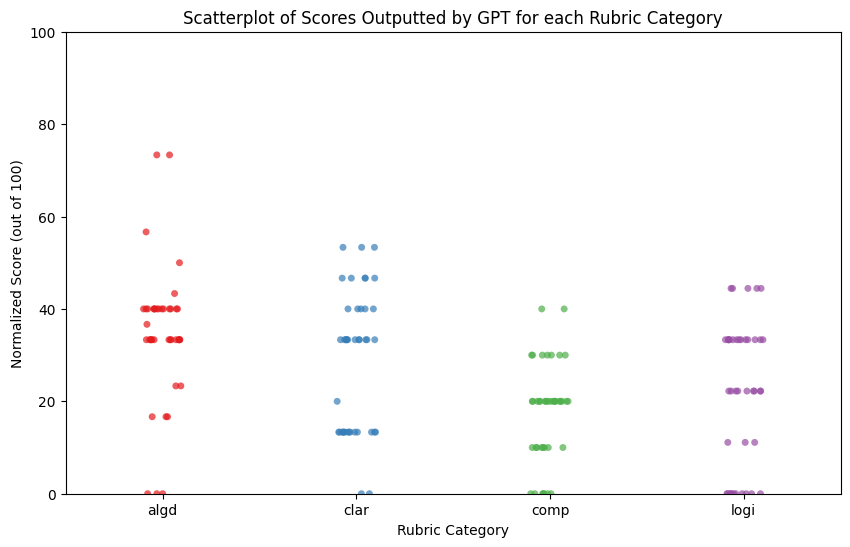

<ipython-input-5-eaa51a4d0f2d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category', y='Normalized_Score', data=df_llm, jitter=True, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


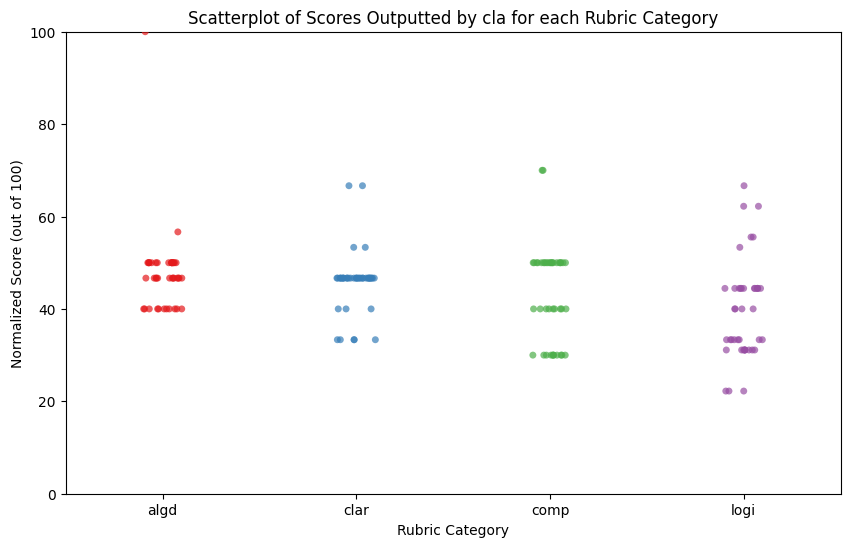

<ipython-input-5-eaa51a4d0f2d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category', y='Normalized_Score', data=df_llm, jitter=True, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


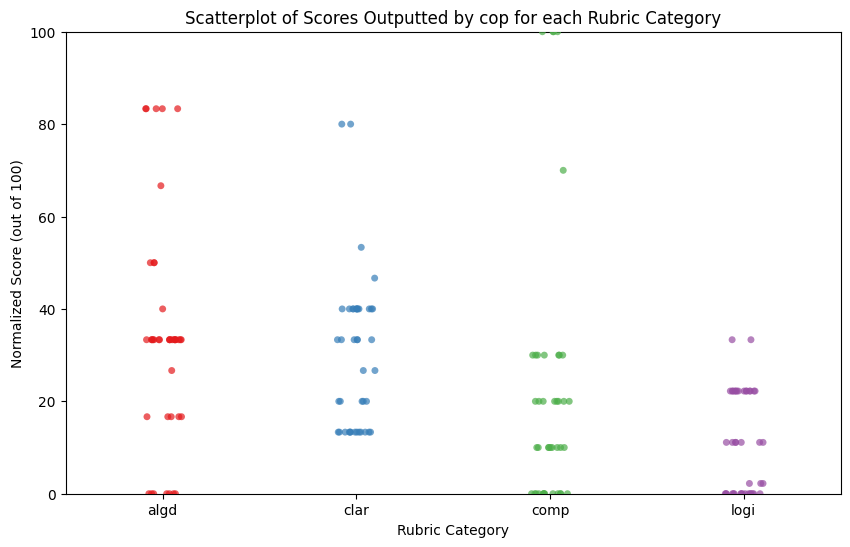

<ipython-input-5-eaa51a4d0f2d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category', y='Normalized_Score', data=df_llm, jitter=True, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


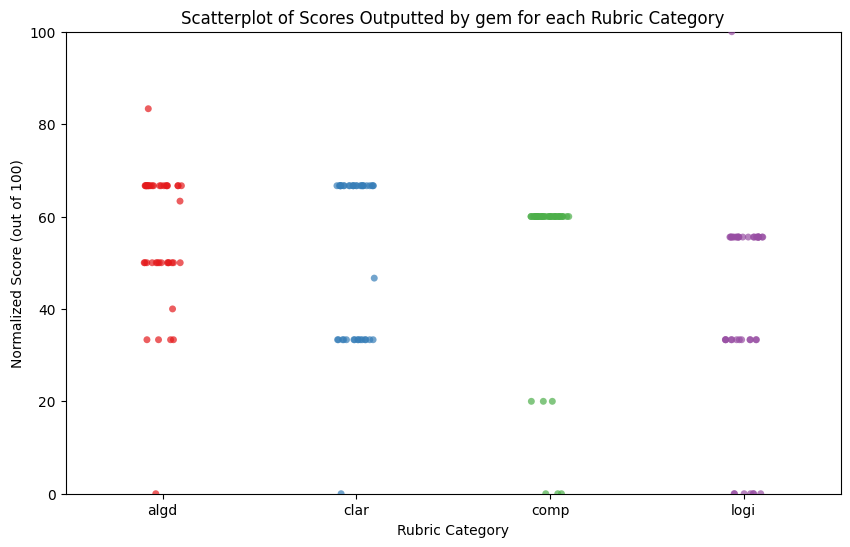

     LLM Category  Score  Trial  Normalized_Score
0    GPT     algd     12      1         40.000000
42   GPT     clar      2      1         13.333333
84   GPT     comp      0      1          0.000000
126  GPT     logi      0      1          0.000000
1    GPT     algd     12      2         40.000000


NameError: name 'categories' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# graph of normalized scores
import matplotlib.pyplot as plt
import seaborn as sns


# Define the maximum scores for normalization
max_scores = {
    'algd': 30,
    'clar': 15,
    'comp': 10,
    'logi': 45
}

# Normalize the scores
df_icc['Normalized_Score'] = df_icc.apply(lambda row: (row['Score'] / max_scores[row['Category']]) * 100, axis=1)

# Replace category codes with full names for better readability in plots
# df_icc['Category'] = df_icc['Category'].map(categories)

# Plot the graphs for each LLM
llms = df_icc['LLM'].unique()
for llm in llms:
    plt.figure(figsize=(10, 6))

    # Filter data for the current LLM
    df_llm = df_icc[df_icc['LLM'] == llm]

    # Plotting
    sns.stripplot(x='Category', y='Normalized_Score', data=df_llm, jitter=True, palette='Set1', alpha=0.7)

    # Adding titles and labels
    plt.title(f'Scatterplot of Scores Outputted by {llm} for each Rubric Category')
    plt.xlabel('Rubric Category')
    plt.ylabel('Normalized Score (out of 100)')
    plt.ylim(0, 100)

    # Show plot
    plt.show()


for llm in llms:
    plt.figure(figsize=(10, 6))

    # Filter data for the current LLM
    df_llm = df_icc[df_icc['LLM'] == llm]
    print(df_llm.head())

    # Plotting
    for category in categories.values():
        df_category = df_llm[df_llm['Category'] == category]
        plt.scatter([category] * len(df_category), df_category['Normalized_Score'], alpha=0.7, label=category)

    # Adding titles and labels
    plt.title(f'Normalized Scores for {llm}')
    plt.xlabel('Rubric Category')
    plt.ylabel('Normalized Score (out of 100)')
    plt.ylim(0, 100)
    plt.legend().set_visible(False)  # Hide legend to avoid redundancy

    # Show plot
    plt.show()



<ipython-input-10-21c99539659c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='LLM_Full', y='Normalized_Score', data=df_algd, jitter=True, palette='Set2', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


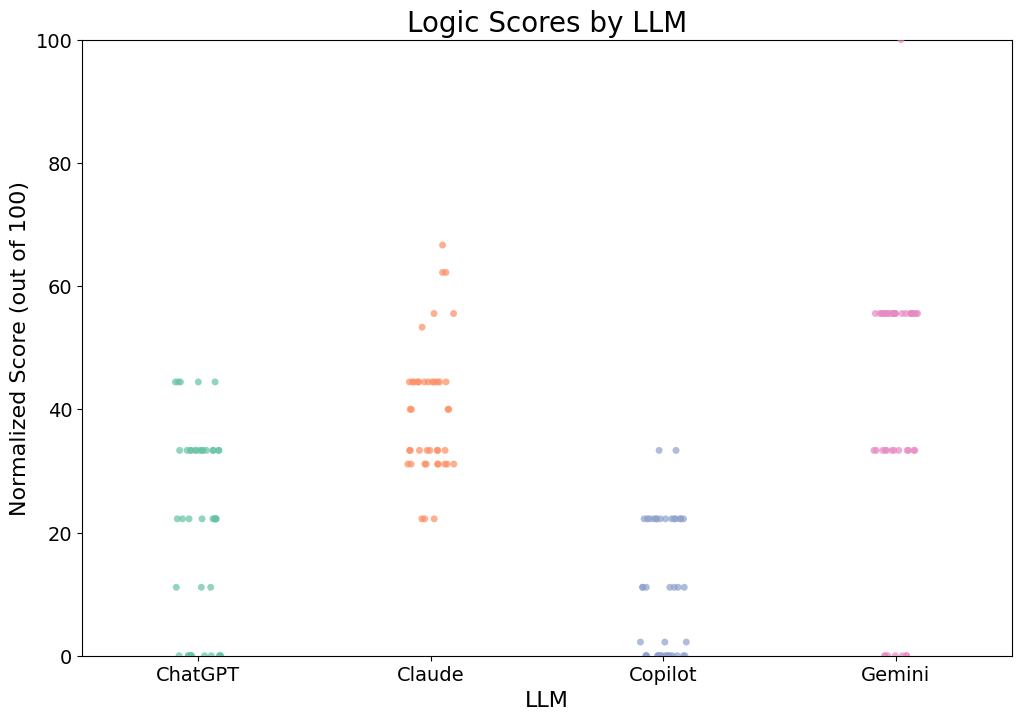

In [ ]:
llm_names = {
    'GPT': 'ChatGPT',
    'cla': 'Claude',
    'cop': 'Copilot',
    'gem': 'Gemini'
}

# replace LLM names with their full names
df_icc['LLM_Full'] = df_icc['LLM'].map(llm_names)

#filter the DataFrame for "Algorithm Design" category
df_algd = df_icc[df_icc['Category'] == 'logi']

# Plot the Algorithm Design scores by LLM
plt.figure(figsize=(12, 8))

# Using seaborn's stripplot to show the actual clusters
sns.stripplot(x='LLM_Full', y='Normalized_Score', data=df_algd, jitter=True, palette='Set2', alpha=0.7)

# Adding titles and labels
plt.title('Logic Scores by LLM', fontsize = 20)
plt.xlabel('LLM', fontsize = 16)
plt.ylabel('Normalized Score (out of 100)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 100)

# Show plot
plt.show()

In [ ]:
# List of rubric categories and LLMs
llms = ['ChatGPT', 'Claude', 'Copilot', 'Gemini']

# nested for loop to calculate and output values, store in dataframe
for llm_idx, llm in enumerate(llms):
        start_row = llm_idx * 168
        end_row = start_row + 168
        specified_df = df_icc.iloc[start_row:end_row]
        icc = pg.intraclass_corr(data=specified_df, targets='Category', raters='Trial', ratings='Score')
        # Pandas display options
        pd.set_option('display.max_columns', 8)
        pd.set_option('display.width', 200)

        #print out full table of results
        print(f'ICC calculation for {llm}:')
        print(icc)

        # useful result
        print("Useful Result:")
        icc = icc.set_index('Description')
        icc_2 = icc.loc['Single random raters', 'ICC']
        print(icc_2.round(3), '\n')



ICC calculation for ChatGPT:
    Type              Description       ICC          F  df1  df2          pval         CI95%
0   ICC1   Single raters absolute  0.482780  40.203427    3  164  1.574236e-19  [0.22, 0.93]
1   ICC2     Single random raters  0.483462  45.029079    3  123  1.041365e-19  [0.22, 0.93]
2   ICC3      Single fixed raters  0.511793  45.029079    3  123  1.041365e-19  [0.24, 0.94]
3  ICC1k  Average raters absolute  0.975126  40.203427    3  164  1.574236e-19   [0.92, 1.0]
4  ICC2k    Average random raters  0.975193  45.029079    3  123  1.041365e-19   [0.92, 1.0]
5  ICC3k     Average fixed raters  0.977792  45.029079    3  123  1.041365e-19   [0.93, 1.0]
Useful Result:
0.483 

ICC calculation for Claude:
    Type              Description       ICC           F  df1  df2          pval         CI95%
0   ICC1   Single raters absolute  0.827726  202.797650    3  164  5.952116e-55   [0.6, 0.99]
1   ICC2     Single random raters  0.827823  234.964948    3  123  9.747583e-51  